In [1]:
import cv2
import numpy as np
import matplotlib .pyplot as plt
import os

num_bins = 16
mask_laplaciano = np.array([[0,1,0],[1,-4,1],[0,1,0]])

def hog(img):
    w2,h2=len(img[0])//2,len(img)//2
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy)
    bins = np.int32(num_bins*ang/(2*np.pi))
    bin_cells = bins[:h2,:w2], bins[h2:,:w2],bins[:h2,w2:],bins[h2:,w2:]
    mag_cells = mag[:h2,:w2], mag[h2:,:w2],mag[:h2,w2:],mag[h2:,w2:]
    hists = [np.bincount(b.ravel(),m.ravel(),num_bins) for b,m in zip(bin_cells, mag_cells)]
    histf = np.hstack(hists)
    return histf

def gethistoGramaNorm(img):
    td = len(img)*len(img[0])
    h = [0]*256
    for f in img:
        for c in f:
            h[int(c)]+=1/td
    return h

def ecualizaImg(img):
    hn = gethistoGramaNorm(img)
    ha = [0]*256
    ha[0] = hn[0]
    for i in range(1,256):
        ha[i] = hn[i]+ha[i-1]
    row,col=len(img),len(img[0])
    newImg = [[0]*col for x in range(row)]
    newImg = np.zeros((row, col))
    for i in range(row):
        for j in range(col):
            newImg[i][j] = int(ha[int(img[i][j])]*255)
    return newImg

def filtradoLaplaciano(imagen,mascara):
    #zero-padding
    new_image = np.zeros((imagen.shape[0] + mascara.shape[0] - 1,
                          imagen.shape[1] + mascara.shape[1] - 1), 
                         dtype = np.uint8)
    
    new_image2 = np.zeros((imagen.shape[0] + mascara.shape[0] - 1,
                          imagen.shape[1] + mascara.shape[1] - 1), 
                         dtype = np.int)
    
    new_image[mascara.shape[0]//2:-mascara.shape[0]//2+1,
              mascara.shape[1]//2:-mascara.shape[1]//2+1] = imagen
    
    for i in range (mascara.shape[0]//2, new_image.shape[0]-mascara.shape[0]//2):
        for j in range(mascara.shape[1]//2, new_image.shape[1]-mascara.shape[1]//2):
            vecindad = new_image[i-mascara.shape[0]//2:i+mascara.shape[0]//2+1,
                                 j-mascara.shape[1]//2:j+mascara.shape[1]//2+1]
            new_image2[i,j] = np.sum(vecindad*mascara)
    
    return new_image2[mascara.shape[0]//2:-mascara.shape[0]//2+1,
                      mascara.shape[1]//2:-mascara.shape[1]//2+1]
def aplicaLaplaciano(im_1):
    lap  = filtradoLaplaciano(im_1,mask_laplaciano)
    new_image_1 = im_1-lap
    np.clip(new_image_1, 0, 255, out=new_image_1)
    img  = new_image_1.astype('uint8')
    return img


#directorios base
base_entr="entrenamiento/"
base_test="prueba3/"

T = []
L = []
#lista de imagenes de letras
for l in range(65,91):
    letb = chr(l)
    dird = base_entr+letb+"/"
    if os.path.isdir(dird):
        lstf = os.listdir(dird)
        for f in lstf:
            img  = cv2.imread(dird+f,0)
            #if l!=73:
            img  = cv2.resize(img,(40,80))
            hist = hog(img)
            T.append(hist)
            L.append(l)
    
#lista de imagenes de numeros
for n in range(0,10):
    letb = str(n)
    dird = base_entr+letb+"/"
    if os.path.isdir(dird):
        lstf = os.listdir(dird)
        for f in lstf:
            img  = cv2.imread(dird+f,0)
            #if n!=1:
            img  = cv2.resize(img,(40,80))
            hist = hog(img)
            T.append(hist)
            L.append(n)


#extras(separadores)
for l in [45,95]:
    letb = chr(l)
    dird = base_entr+letb+"/"
    if os.path.isdir(dird):
        lstf = os.listdir(dird)
        for f in lstf:
            img  = cv2.imread(dird+f,0)
            #if l!=73:
            img  = cv2.resize(img,(40,80))
            hist = hog(img)
            T.append(hist)
            L.append(l)

            
data   = np.vstack(T)
labels = np.vstack(L)
data   = np.float32(data)

#creando y entrenando modelo
svm = cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setType(cv2.ml.SVM_C_SVC)
svm.setC(2.67)
svm.setGamma(5.383)
svm.train(data, cv2.ml.ROW_SAMPLE, labels)


True

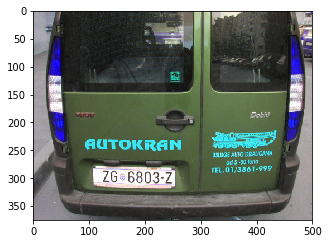

ZG68O3-Z


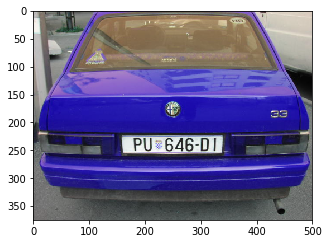

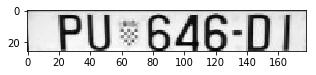

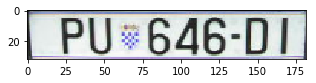

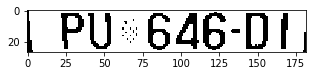

PU646-DI


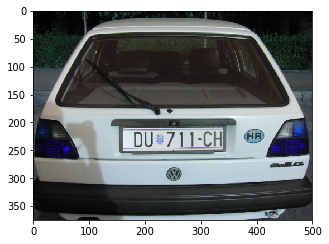

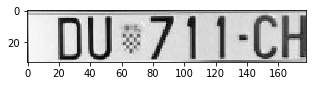

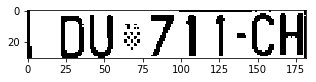

DU--711-CH


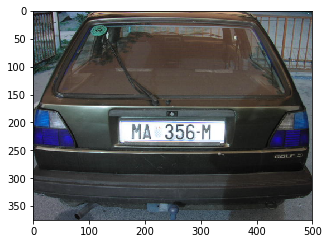

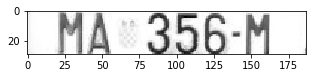

MA356-M


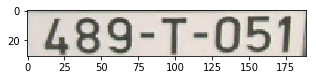

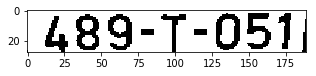

489-T-O51


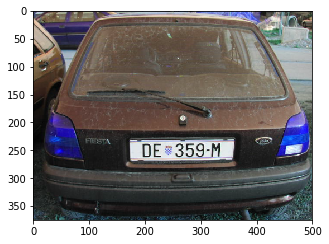

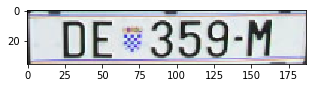

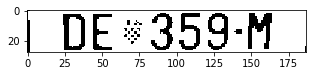

DE--359-M


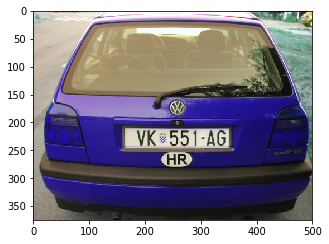

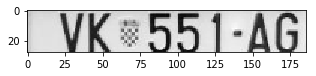

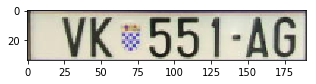

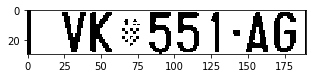

VK-_551-AG


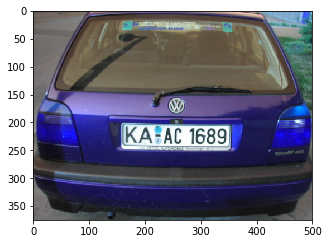

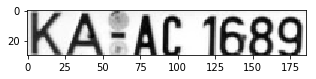

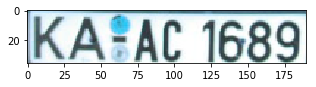

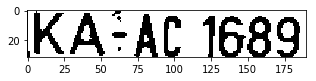

KA6AC1689


In [51]:
def erosion(binaryImage):
    newImage = np.zeros(binaryImage.shape,dtype='uint8')
    for i in range(1,binaryImage.shape[0]-1):
        for j in range(1,binaryImage.shape[1]-1):
            if binaryImage[i,j] == 255 and binaryImage[i-1,j] == 255 and binaryImage[i-1,j] == 255 and binaryImage[i-1,j] == 255 and binaryImage[i-1,j] == 255:
                    newImage[i,j] = 255
    return newImage

def dilatacion(binaryImage):
    newImage = np.zeros(binaryImage.shape,dtype='uint8')
    for i in range(1,binaryImage.shape[0]-1):
        for j in range(1,binaryImage.shape[1]-1):
            if binaryImage[i,j] == 255:
                newImage[i,j] = 255
                newImage[i-1,j] = 255
                newImage[i+1,j] = 255
                newImage[i,j-1] = 255
                newImage[i,j+1] = 255
    return newImage

def apertura(binaryImage):
    im1 = erosion(binaryImage)
    im2 = dilatacion(im1)
    return im2

def cierre(binaryImage):
    im1 = dilatacion(binaryImage)
    im2 = erosion(im1)
    return im2


def preprocess(img):
    imgBlurred = cv2.GaussianBlur(img, (5,5), 0)
    gray = cv2.cvtColor(imgBlurred, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray,cv2.CV_8U,1,0,ksize=3)
    ret2,threshold_img = cv2.threshold(sobelx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return threshold_img

def gamma_correction(image, gama):
    newImg = np.zeros((image.shape[0], image.shape[1]), np.uint8);
    f = len(image)
    c = len(image[0])
    p = pow(255, gama-1)
    for i in range(f):
        for j in range(c):
            newImg[i][j] = int( pow(image[i][j], gama)/p )
    return newImg

def detectaCaracteres(img):
    imw = len(img[0])
    imh = len(img)
    imo = img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #mostrando imagen original
    plt.figure(figsize=(5,5))
    plt.subplot(1,1,1), plt.imshow(imo, cmap='gray')
    plt.show()
    
    #convirtiendo a binario para poder detectar mejor los bordes
    ret,img = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
    
    #realizando busqueda de lineas horizontales muy largas o lineas con muy pocos puntos para descartarlos verticalmente
    #arriba:
    maxvert1=0
    for i in range(10):
        inline = 0
        contpt = 0
        maxline = 0
        cntline = 0
        for j in range(imw):
            if img[i][j]==0:
                contpt+=1
                if inline:
                    cntline+=1
                else:
                    inline=1
                    cntline=1
            else:
                if inline:
                    if cntline>maxline:
                        maxline=cntline
                    cntline=0
                    inline=0
        if cntline>maxline:
            maxline=cntline
        if contpt<10 or maxline>=20:
            maxvert1=i
    #abajo:
    maxvert2=imh-1
    for i in reversed(range(imh-9,imh)):
        
        inline = 0
        contpt = 0
        maxline = 0
        cntline = 0
        for j in range(imw):
            if img[i][j]==0:
                contpt+=1
                if inline:
                    cntline+=1
                else:
                    inline=1
                    cntline=1
            else:
                if inline:
                    if cntline>maxline:
                        maxline=cntline
                    cntline=0
                    inline=0
        if cntline>maxline:
            maxline=cntline
        if  maxline>=20:
            maxvert2=i
    #recortando imagen con la deteccion
    img=img[maxvert1-1:maxvert2,:]
    imo=imo[maxvert1-1:maxvert2,:]
    #reordenando ancho
    imh = len(img)
    
    
    
    #mostrando imagen binaria
    plt.figure(figsize=(5,5))
    plt.subplot(1,1,1), plt.imshow(img, cmap='gray')
    plt.show()
    
    
    #realizando histograma de sumas verticales para detectar subidas y bajadas de pixeles y detectar limites por letra
    hist = [0]*imw
    for j in range(imw):
        c=0
        for i in range(imh):
            c+=255-img[i][j]
        hist[j]=c
    #identificando menor punto
    lmax=max(hist)
    lmin=min(hist)
    mlim=lmin+0.06*(lmax-lmin)
    #identificando limites
    inim=False
    pi=0
    pf=0
    rf=""
    for j in range(imw):
        if hist[j]>mlim:
            if inim:
                pf+=1
            else:
                pi=j
                pf=j
                inim=True
        else:
            if inim:
                if (pf-pi)>2:
                    #dibujando caracter
                    #plt.figure(figsize=(4,4))
                    #plt.subplot(1,1,1), plt.imshow(img[0:imh,pi:pf], cmap='gray')
                    #plt.show()
                    #print(pi,pf)
                   
                    #considerando unos pixeles de error a los costados para que se parezca mas a las imagenes de entrenamiento
                    l1=pi-3
                    l2=pf+3
                    if l1<0:
                        l1=0
                    if l2>=imw:
                        l2=imw-1
                    
                    #plt.figure(figsize=(5,5))
                    #plt.subplot(1,1,1), plt.imshow(imo[0:imh,l1:l2])
                    #plt.show()
                    
                    #comparando contra diccionario
                    chre = imo[0:imh,l1:l2]
                    chre = cv2.resize(chre,(15,32))
                    Test = [np.float32(hog(chre))]
                    Test = np.float32(Test)
                    rest = svm.predict(Test)
                    #agregando resultado al string general
                    ndr  = int(rest[1][0][0])
                    if ndr<10:
                        rf+=str(ndr)
                    else:
                        rf+=chr(ndr)
            inim=False
    print(rf)
    
import os
import imutils
datp = os.listdir(base_test)
for f in datp:
    #imagen original
    imo = cv2.imread(base_test+f)
    imo = imutils.resize(imo, width=500)
    #mostrando imagen original
    plt.figure(figsize=(5,5))
    plt.subplot(1,1,1), plt.imshow(imo)
    plt.show()
    #leyendo imagen en escala de grises
    img = cv2.imread(base_test+f)
    img = imutils.resize(img, width=500)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #verificando bordes
    bordes = cv2.Canny(img, 170, 200)
    #encontrando contornos basados en esquinas
    (new, cnts, _) = cv2.findContours(bordes.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    #eligiendo imagenes basado en su area, se descarta imagenes deasiado pequenas
    cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:50]
    #buscando imagenes que tengan 4 esquinas (rectangulo)
    count = 0
    NumberPlateCnt = None
    for c in cnts:
        peri = cv2.arcLength(c, True)
        aprox = cv2.approxPolyDP(c, 0.02 * peri, True)
        #verificando que tenga entre 4 y 6 esquinas(por errores en deteccion)
        if len(aprox)>=4 and len(aprox)<=6:
            #conviertiendo a array normal
            temp = []
            for x in aprox:
                temp.append([x[0][0],x[0][1]])
            #quitando puntos muy similares
            while(True):
                cnt=0
                for i in range(len(temp)):
                    for j in range(len(temp)):
                        if i==j:
                            continue
                        else:
                            d=pow(pow(temp[i][0]-temp[j][0],2)+pow(temp[i][1]-temp[j][1],2),0.5)
                            if d<20:
                                temp.pop(i)
                                cnt=1
                                break
                    if cnt==1:
                        break
                if cnt==0:
                    break
            if len(temp)==4:##la figura resultante es de 4 esquinas
                temp.sort()
                if temp[0][1]>temp[1][1]:
                    temp[0][1],temp[1][1]=temp[1][1],temp[0][1]
                if temp[2][1]>temp[3][1]:
                    temp[2][1],temp[3][1]=temp[3][1],temp[2][1]
                #ordenando y detectando los limites correctos
                p1j=(temp[0][0]+temp[1][0])//2
                p2j=(temp[2][0]+temp[3][0])//2
                p1i=(temp[0][1]+temp[2][1])//2
                p2i=(temp[1][1]+temp[3][1])//2
                #verificando las proporciones
                rat=(p2j-p1j)/(p2i-p1i)
                if abs(rat-5)<3:
                    #dibujando eleccion para verificar
                    plcImg=img[p1i+3:p2i-3,p1j:p2j]
                    plt.figure(figsize=(5,5))
                    plt.subplot(1,1,1), plt.imshow(plcImg, cmap='gray')
                    plt.show()
                    #procediendo a separar caracteres
                    detectaCaracteres(imo[p1i:p2i,p1j-2:p2j+2])
                    break
